In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math,copy

In [2]:
file_path = '../data/USA_Housing.csv'
house = pd.read_csv(file_path)


In [28]:
house.head(10)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
5,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
6,64698.463428,6.025336,8.147760,3.41,60828.249085,1.502056e+06,"4759 Daniel Shoals Suite 442\nNguyenburgh, CO ..."
7,78394.339278,6.989780,6.620478,2.42,36516.358972,1.573937e+06,"972 Joyce Viaduct\nLake William, TN 17778-6483"
8,59927.660813,5.362126,6.393121,2.30,29387.396003,7.988695e+05,USS Gilbert\nFPO AA 20957
9,81885.927184,4.423672,8.167688,6.10,40149.965749,1.545155e+06,Unit 9446 Box 0958\nDPO AE 97025


In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [3]:
features = ['Avg. Area Income','Avg. Area Income','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population']
x = house[features].values
y = house['Price'].values
m = len(y)

In [7]:
x.shape[0]

5000

In [8]:
y.shape

(5000,)

In [4]:
x_mean = x.mean(axis=0)
x_std = x.std(axis=0)
x_scaled = (x - x_mean)/x_std

In [5]:
n = x_scaled.shape[1]
w = np.zeros(n)
b = 0

In [6]:
def cost_function(x,y,w,b):
    m = len(y)
    e = x.dot(w) + b - y
    return (1/(2*m)) * np.dot(e,e)

In [7]:
def gradient(x,y,w,b):
    m = len(y)
    e = x.dot(w) + b -y

    dj_dw = (1/(m)) * x.T.dot(e)
    dj_db = (1/m) * np.sum(e)
    return dj_dw,dj_db

In [8]:
def gradient_descent(x,y,w,b,alpha,iters):
    cost_history = []
    for i in range(iters):
        dj_dw,dj_db = gradient(x,y,w,b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        cost_history.append(cost_function(x,y,w,b))
        if i % (iters/10) == 0:
            print(f"iteration{i:4d}:cost {cost_history[-1]}")
    return w,b,cost_history        
    

In [9]:
alpha = 0.01
iteration = 1000
w_final,b_final,cost_hist = gradient_descent(x_scaled,y,w,b,alpha,iteration)
print(f"w = {w_final},b = {b_final}")

iteration   0:cost 804837813558.4083
iteration 100:cost 121093409344.61023
iteration 200:cost 32366626823.293945
iteration 300:cost 20468503421.251804
iteration 400:cost 18849883181.48452
iteration 500:cost 18624106887.727024
iteration 600:cost 18590796287.41475
iteration 700:cost 18585287800.717937
iteration 800:cost 18584192902.471645
iteration 900:cost 18583924407.76396
w = [114748.1060766  114748.1060766  118564.73114637   4417.29923572
 147835.73725409],b = 1232019.4640289764


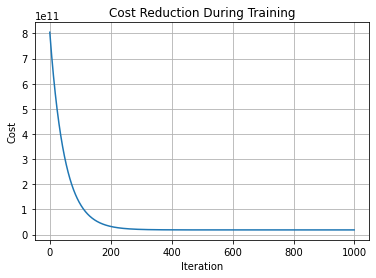

In [10]:
plt.plot(cost_hist)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost Reduction During Training")
plt.grid(True)
plt.show()


In [11]:
new_house = np.array([[65000,5,7,4,30000]])
ns = (new_house - x_mean) / x_std
y_pred = ns.dot(w_final) + b_final
print(f"Predicted price is ${y_pred[0]:.2f}")


Predicted price is $364721.36


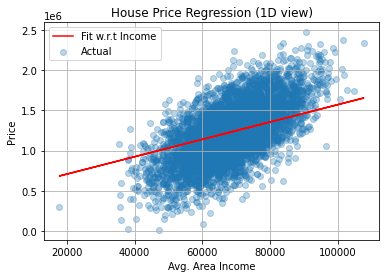

In [33]:
plt.scatter(house['Avg. Area Income'], y, alpha=0.3, label='Actual')
income_scaled = (house['Avg. Area Income'] - x_mean[0]) / x_std[0]
y_line = w_final[0] * income_scaled + b_final
plt.plot(house['Avg. Area Income'], y_line, color='red', label='Fit w.r.t Income')
plt.xlabel("Avg. Area Income")
plt.ylabel("Price")
plt.title("House Price Regression (1D view)")
plt.legend()
plt.grid(True)
plt.show()


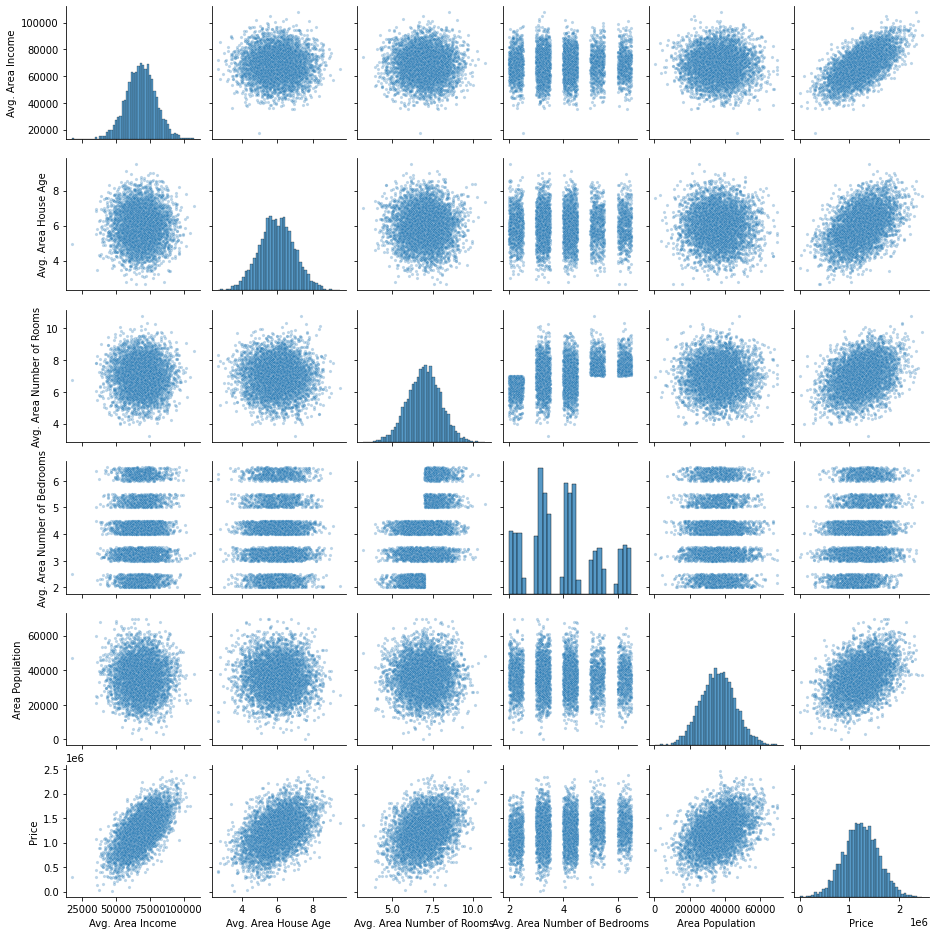

In [38]:
import seaborn as sns
sns.pairplot(house,height=2.2,       # smaller subplot size
             aspect=1,         # shape of each plot
             plot_kws={'alpha': 0.3, 's': 10})
plt.show()